# extract FITS image for LSSTCam   

In [ ]:
from lsst.daf.butler import Butler
from lsst.daf.butler.registry import Registry


In [ ]:
repo = 'embargo'
instrument = 'LSSTCam'
datasetType = 'post_isr_image'
# raw all collection contains all images 
collections = ["LSSTCam/runs/nightlyValidation", "LSSTCam/defaults",]

butler = Butler(repo, collections=collections, instrument=instrument)

registry = butler.registry

#uncomment to get the help page
#help(registry) 

## Find the exposures
Listing the images could be done with butler using one of the tutorial queries.
May 3 had over 500 science quality images of M49, Prawn, Trifid-Lagoon,  day_obs = 20250503, 
BLOCK-T365 denotes sciene image taking .


In [ ]:

day = 20250503
block = 'BLOCK-T365'  #  AND exposure.science_program='{block}' - not workgin
target = 'M49'  # change to Prawn etc. to get others
dims = ['exposure']
datasetType = 'post_isr_image'

result = registry.queryDataIds( datasets=datasetType, dimensions = dims, where = 
          f"day_obs = {day}   AND exposure.target_name='{target}' "
                             )
results = [r for r in result]

#print(r['exposure']

print (f"got {len(results)} images")

LSSTCam has 202 images per exposure - this will list the exposures. 
The last digits after the daynumber  match the 'Seq. No.' in RubinTV

In [ ]:
exp=""
exposures = []
for r in results:
   if r['exposure'] != exp:
        exp=  r['exposure']
        exposures.append(exp)

print (f"there are {len(exposures)} exposures")
print (exposures)


This is just getting the datasetref for an exposure (this is LSSTcam so that should be 189 images one per detector) unless the corner rafts show up

In [ ]:
datasetRefs = registry.queryDatasets(datasetType=datasetType,
                                     where=f'exposure = {exposures[100]}')


## Write fits 
Write out fits files for the first count images. 
By default you will not have enough space to write all the files.

In [ ]:
images = []
count = 0 
stop = 10  # just write this many images
for count, exp in enumerate(datasetRefs):
    fn=f"Rubin-{exp.dataId['exposure']}-{exp.dataId['detector']}.fits"
    img = butler.get(datasetType,exp.dataId)
    img.writeFits(fn)
    images.append(exp)
    if count >= stop:
        break
    
print (f"{count+1} images output")

Now we have Fits files we can use with external code.
We get the list of files we made and process them with SEP (Source Extractor Python) as an example of external code. 
We will make a list of Objects and store that.

In [ ]:
import glob
filelist = glob.glob('Rubin-*.fits')
print (filelist)

## If you want to plot one of these 

<Figure size 640x480 with 0 Axes>

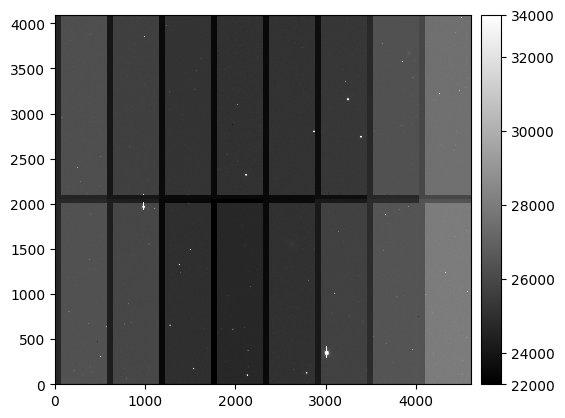

In [ ]:
import pylab as plt
import lsst.afw.display as afwDisplay

afwDisplay.setDefaultBackend('matplotlib')

for exp in datasetRefs:
    dataId=exp.dataId
    img = butler.get('raw', dataId=dataId)

    fig = plt.figure()
    display = afwDisplay.Display()
    display.scale('linear', 'zscale')
    display.mtv(img)
    plt.show()